<h1>DF pokemons

Всем привет решил вот проанализировать DF pokemons. !Тут только до 6 го поколениея на 2022 год их 8

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pokemons=pd.read_csv('Pokemon.csv')

In [4]:
pokemons

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Давайте переименуем название колонок в интересующий насформат.

In [5]:
pokemons.rename(columns=lambda x: x.lower().replace('. ','_'),inplace=True)
pokemons.rename(columns=lambda x: x.replace(' ',''),inplace=True)
pokemons.rename(columns={'#':'number_pokemon'},inplace=True)

In [6]:
pokemons

,number_pokemon,name,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


 Давайте сделаем индексами колоннку с именами покемонов.

In [7]:
pokemons_name=pokemons.set_index('name')

In [8]:
pokemons_name

,number_pokemon,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


Удобно наблюдать за покемонами, однако можно еще лучше! Давайте создадим стиля для типов покемонов!

In [9]:
def color_type_pokemon_type(df):
    ret = pd.DataFrame("", index=df.index, columns=df.columns)
    # для типа 1
    ret.loc[df.type1=='Grass',"type1"]="background-color: #0ad100; color: "
    ret.loc[df.type1=='Fire',"type1"]="background-color: #ff7300; color: white"
    ret.loc[df.type1=='Water',"type1"]="background-color: #00ddfa; color: black"
    ret.loc[df.type1=='Bug',"type1"]="background-color: #47ff5a; color: black"
    ret.loc[df.type1=='Normal',"type1"]="background-color: #ebebeb; color: black"
    ret.loc[df.type1=='Poison',"type1"]="background-color: #8119ff; color: white"
    ret.loc[df.type1=='Electric',"type1"]="background-color: #f6ff00; color: black"
    ret.loc[df.type1=='Rock',"type1"]="background-color: #b54800; color: white"
    ret.loc[df.type1=='Fairy',"type1"]="background-color: #f782ff; color: black"
    ret.loc[df.type1=='Ground',"type1"]="background-color: #b57300; color: white"
    ret.loc[df.type1=='Flying',"type1"]="background-color: #d6efff; color: black"
    ret.loc[df.type1=='Psychic',"type1"]="background-color: #ff21de; color: black"
    ret.loc[df.type1=='Ghost',"type1"]="background-color: #8b00d1; color: black"
    ret.loc[df.type1=='Ice',"type1"]="background-color: #5db2cf; color: black"
    ret.loc[df.type1=='Dragon',"type1"]="background-color: #4951b8; color: white"
    ret.loc[df.type1=='Dark',"type1"]="background-color: #250040; color: white"
    ret.loc[df.type1=='Steel',"type1"]="background-color: #616161; color: white"
    ret.loc[df.type1=='Fighting',"type1"]="background-color: #ff0000; color: black"
    # для типа 2
    ret.loc[df.type2=='Grass',"type2"]="background-color: #0ad100; color: "
    ret.loc[df.type2=='Fire',"type2"]="background-color: #ff7300; color: white"
    ret.loc[df.type2=='Water',"type2"]="background-color: #00ddfa; color: black"
    ret.loc[df.type2=='Bug',"type2"]="background-color: #47ff5a; color: black"
    ret.loc[df.type2=='Normal',"type2"]="background-color: #ebebeb; color: black"
    ret.loc[df.type2=='Poison',"type2"]="background-color: #8119ff; color: white"
    ret.loc[df.type2=='Electric',"type2"]="background-color: #f6ff00; color: black"
    ret.loc[df.type2=='Rock',"type2"]="background-color: #b54800; color: white"
    ret.loc[df.type2=='Fairy',"type2"]="background-color: #f782ff; color: black"
    ret.loc[df.type2=='Ground',"type2"]="background-color: #b57300; color: white"
    ret.loc[df.type2=='Flying',"type2"]="background-color: #d6efff; color: black"
    ret.loc[df.type2=='Psychic',"type2"]="background-color: #ff21de; color: black"
    ret.loc[df.type2=='Ghost',"type2"]="background-color: #8b00d1; color: black"
    ret.loc[df.type2=='Ice',"type2"]="background-color: #5db2cf; color: black"
    ret.loc[df.type2=='Dragon',"type2"]="background-color: #4951b8; color: white"
    ret.loc[df.type2=='Dark',"type2"]="background-color: #250040; color: white"
    ret.loc[df.type2=='Steel',"type2"]="background-color: #616161; color: white"
    ret.loc[df.type2=='Fighting',"type2"]="background-color: #ff0000; color: black"
    return ret

In [10]:
#ret = pd.DataFrame("", index=pokemons_name.index, columns=pokemons_name.columns) - создает пустую таблицу

In [11]:
pokemons_name_color_type=pokemons_name[['type1','type2']].style.apply(color_type_pokemon_type, axis=None)

In [12]:
pokemons_name_color_type

,type1,type2
name,,
Bulbasaur,Grass,Poison
Ivysaur,Grass,Poison
Venusaur,Grass,Poison
VenusaurMega Venusaur,Grass,Poison
Charmander,Fire,nan
Charmeleon,Fire,nan
Charizard,Fire,Flying
CharizardMega Charizard X,Fire,Dragon
CharizardMega Charizard Y,Fire,Flying


Вот это уже другое дело!

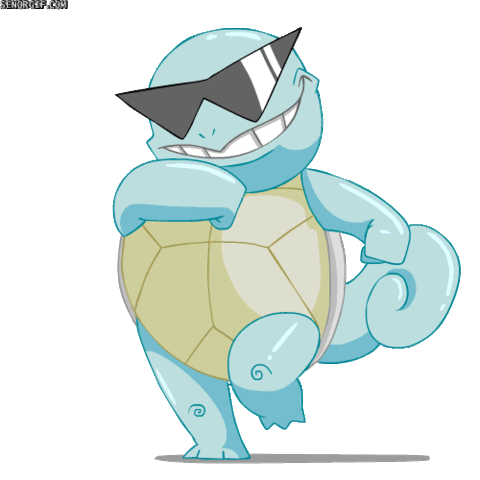

Давайте узнаем, какой процент покемонов имеет 2 типа!

In [13]:
round((pokemons_name.dropna().shape[0]/pokemons_name.shape[0]*100),2)

51.75

Ого! А я и не знал!
Спосибо Python!

Давайте узнаем сколько покемонов

In [14]:
generation_p=pokemons_name.groupby('generation',as_index=False).number_pokemon.count()

Text(0.5, 1.0, 'Количство')

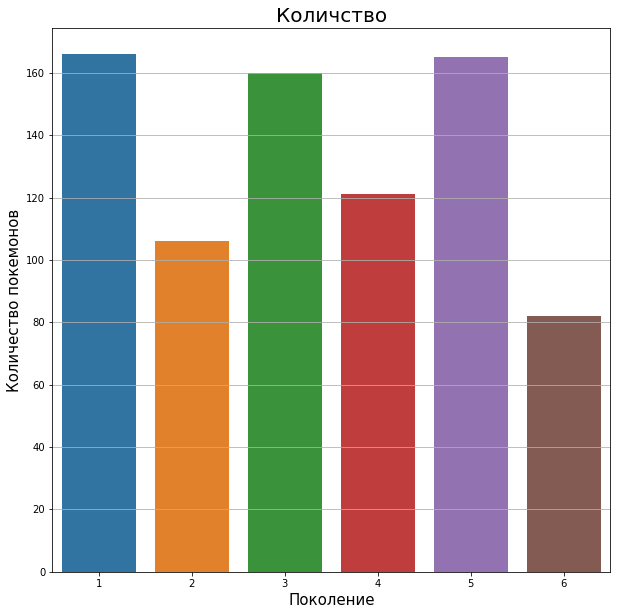

In [15]:
plt.figure(figsize=(10,10))
plt.grid()
ax1=sns.barplot(data=generation_p,x='generation',y='number_pokemon')
ax1.set_xlabel('Поколение', fontsize = 15)
ax1.set_ylabel('Количество покемонов', fontsize = 15)
ax1.set_title('Количство',fontsize=20)

Из граффиков видно, что самое большое колличество покемонов приходится на первое поколение.

А сколько покемонов легендарных в разных поколениях? 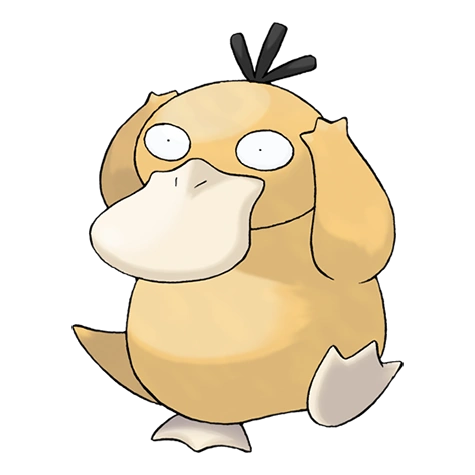

Text(0.5, 1.0, 'Количство легендарных покемонов')

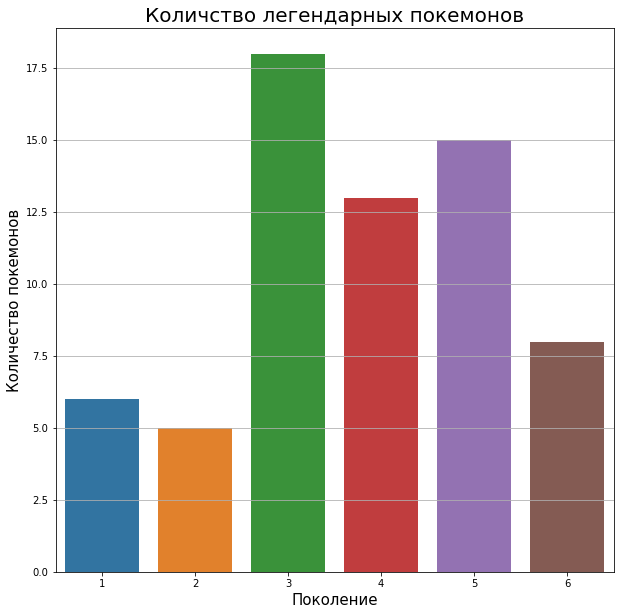

In [16]:
count_legendary=pokemons_name.query('legendary==True').groupby('generation',as_index=False).number_pokemon.count()
plt.figure(figsize=(10,10))
plt.grid()
ax1=sns.barplot(data=count_legendary,x='generation',y='number_pokemon')
ax1.set_xlabel('Поколение', fontsize = 15)
ax1.set_ylabel('Количество покемонов', fontsize = 15)
ax1.set_title('Количство легендарных покемонов',fontsize=20)

Хм... Мда, 3 поколение уделывает по Легендаркам.

А Самый сильный покемон - это какой? Возможно самым большим показателем силы?

In [17]:
maxtotalpok=pokemons_name[pokemons_name.total==pokemons_name.total.max()]

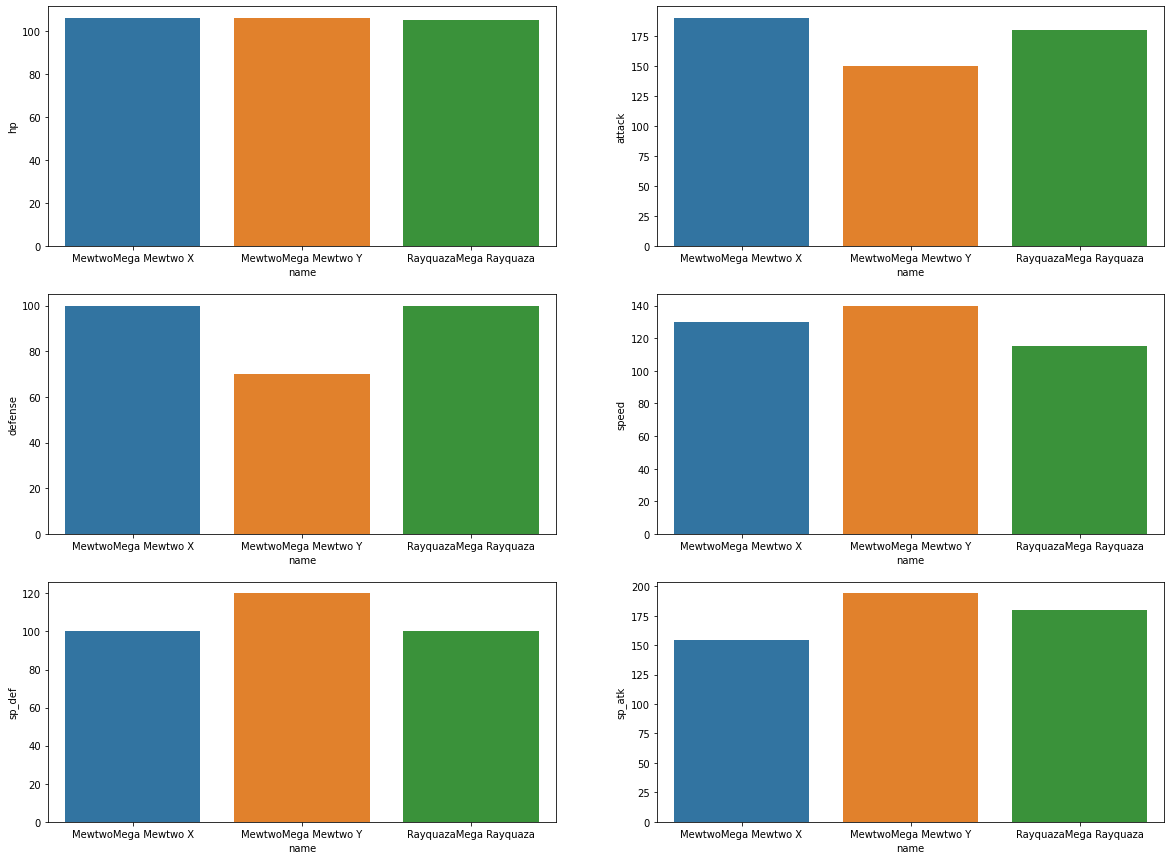

In [18]:
f, axes = plt.subplots(3,2, figsize=(20,15))
ax1=sns.barplot(data=maxtotalpok,x=maxtotalpok.index,y='hp', ax=axes[0,0])
ax1=sns.barplot(data=maxtotalpok,x=maxtotalpok.index,y='attack', ax=axes[0,1])
ax1=sns.barplot(data=maxtotalpok,x=maxtotalpok.index,y='defense', ax=axes[1,0])
ax1=sns.barplot(data=maxtotalpok,x=maxtotalpok.index,y='speed', ax=axes[1,1])
ax1=sns.barplot(data=maxtotalpok,x=maxtotalpok.index,y='sp_def', ax=axes[2,0])
ax1=sns.barplot(data=maxtotalpok,x=maxtotalpok.index,y='sp_atk', ax=axes[2,1])

из граффиков видно, что самый сильный покемон это МегаМюту Y
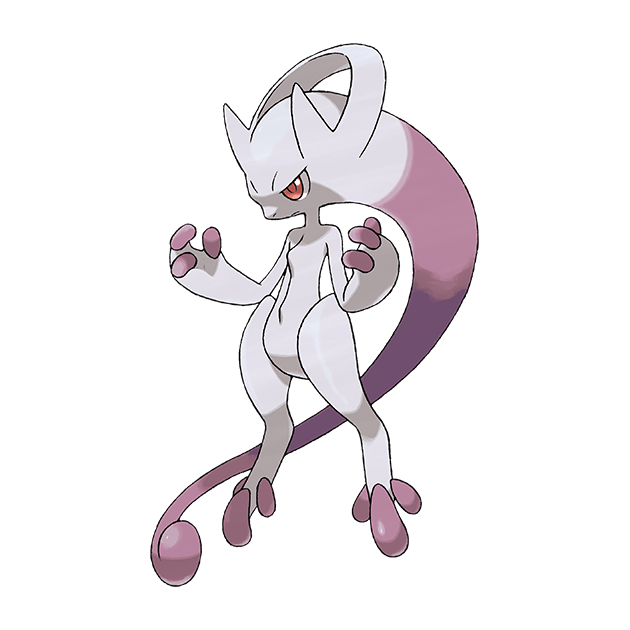

Но он Легендарный, Так не честно !!! А давайте посмотрим, какой НЕ легендарный покемон самый сильный!

In [19]:
no_legendary=pokemons_name[pokemons_name.legendary==False]

In [20]:
no_legendary_maxtotal=no_legendary[no_legendary.total==no_legendary.total.max()]

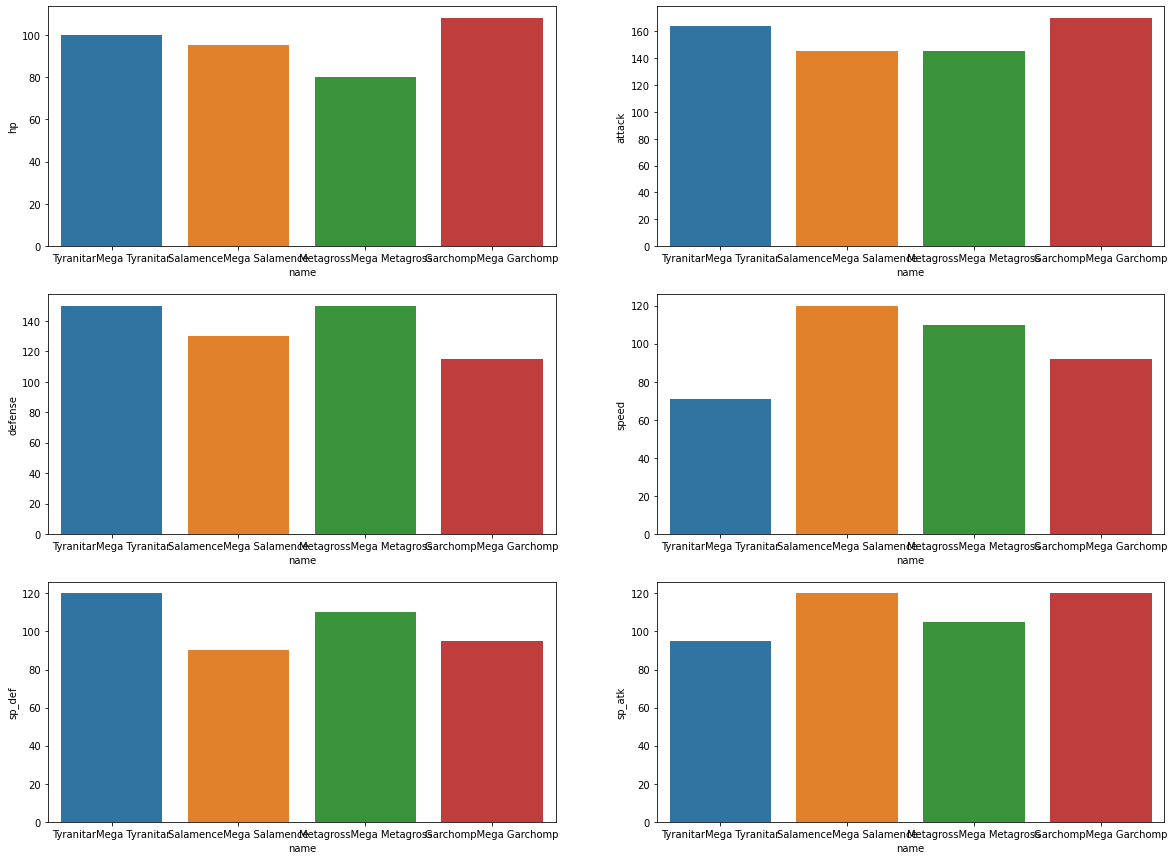

In [21]:
f, axes = plt.subplots(3,2, figsize=(20,15))
ax1=sns.barplot(data=no_legendary_maxtotal,x=no_legendary_maxtotal.index,y='hp', ax=axes[0,0])
ax1=sns.barplot(data=no_legendary_maxtotal,x=no_legendary_maxtotal.index,y='attack', ax=axes[0,1])
ax1=sns.barplot(data=no_legendary_maxtotal,x=no_legendary_maxtotal.index,y='defense', ax=axes[1,0])
ax1=sns.barplot(data=no_legendary_maxtotal,x=no_legendary_maxtotal.index,y='speed', ax=axes[1,1])
ax1=sns.barplot(data=no_legendary_maxtotal,x=no_legendary_maxtotal.index,y='sp_def', ax=axes[2,0])
ax1=sns.barplot(data=no_legendary_maxtotal,x=no_legendary_maxtotal.index,y='sp_atk', ax=axes[2,1])

In [22]:
no_legendary_maxtotal

,number_pokemon,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
name,,,,,,,,,,,,
TyranitarMega Tyranitar,248,Rock,Dark,700,100,164,150,95,120,71,2,False
SalamenceMega Salamence,373,Dragon,Flying,700,95,145,130,120,90,120,3,False
MetagrossMega Metagross,376,Steel,Psychic,700,80,145,150,105,110,110,3,False
GarchompMega Garchomp,445,Dragon,Ground,700,108,170,115,120,95,92,4,False


Tyranitar я выбираю тебя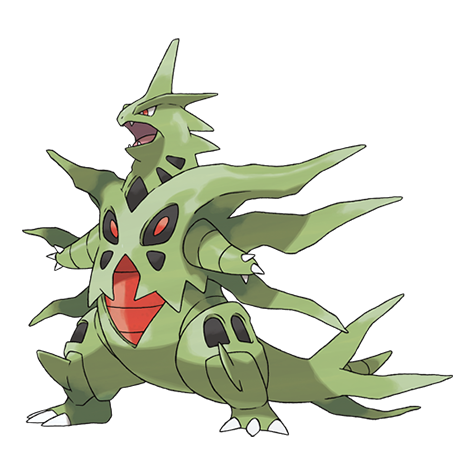 Стакнем чтоль!

In [23]:
point=pokemons_name.melt(ignore_index=False,id_vars=['legendary','number_pokemon','type1','type2'])

In [24]:
pokemons_name.stack() #удобно

name                     
Bulbasaur  number_pokemon         1
           type1              Grass
           type2             Poison
           total                318
           hp                    45
                              ...  
Volcanion  sp_atk               130
           sp_def                90
           speed                 70
           generation             6
           legendary           True
Length: 9214, dtype: object

In [25]:
point_1=point[['number_pokemon','variable','value']].reset_index()

<AxesSubplot:xlabel='number_pokemon', ylabel='value'>

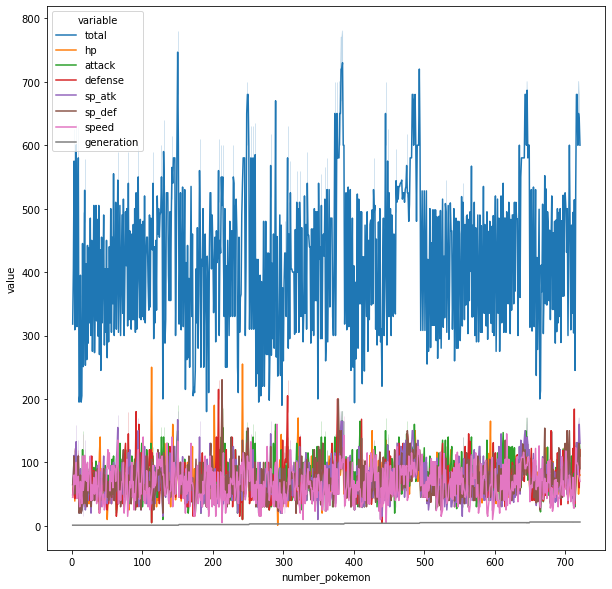

In [26]:
plt.figure(figsize=(10,10))
sns.lineplot(data=point_1,x='number_pokemon', y="value",hue='variable')

In [27]:
point_1

,name,number_pokemon,variable,value
0,Bulbasaur,1,total,318
1,Ivysaur,2,total,405
2,Venusaur,3,total,525
3,VenusaurMega Venusaur,3,total,625
4,Charmander,4,total,309
...,...,...,...,...
6395,Diancie,719,generation,6
6396,DiancieMega Diancie,719,generation,6
6397,HoopaHoopa Confined,720,generation,6
6398,HoopaHoopa Unbound,720,generation,6


In [33]:
point_1.pivot('varible')

TypeError: pivot() missing 1 required argument: 'columns'

In [76]:
col_pok_type1=pokemons_name.reset_index().groupby(['type1','type2','generation']).name.count().reset_index()

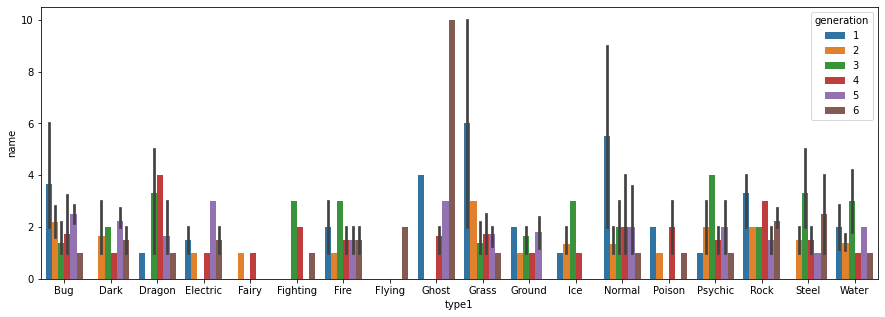

In [88]:
plt.figure(figsize=(15,5))
ax1=sns.barplot(data=col_pok_type1,x='type1',y='name',hue='generation')

In [91]:
col_pok_type1.max()

type1         Water
type2         Water
generation        6
name             10
dtype: object

In [93]:
col_pok_type1.melt(id_vars='type1')

,type1,variable,value
0,Bug,type2,Electric
1,Bug,type2,Fighting
2,Bug,type2,Fire
3,Bug,type2,Flying
4,Bug,type2,Flying
...,...,...,...
631,Water,name,1
632,Water,name,1
633,Water,name,1
634,Water,name,2
